# 1.3.3.4 Challenge - Advanced Regression
### Sam Fradkin

# Challenge

_Now that you have two new regression methods at your fingertips, it's time to give them a spin. In fact, for this challenge, let's put them together! Pick a dataset of your choice with a binary outcome and the potential for at least 15 features. If you're drawing a blank, the crime rates in 2013 dataset has a lot of variables that could be made into a modelable binary outcome._

_Engineer your features, then create three models. Each model will be run on a training set and a test-set (or multiple test-sets, if you take a folds approach). The models should be:_

_1) Vanilla logistic regression_<br>
_2) Ridge logistic regression_<br>
_3) Lasso logistic regression_<br>

_If you're stuck on how to begin combining your two new modeling skills, here's a hint: the SKlearn LogisticRegression method has a "penalty" argument that takes either 'l1' or 'l2' as a value._

_In your report, evaluate all three models and decide on your best. Be clear about the decisions you made that led to these models (feature selection, regularization parameter selection, model evaluation criteria) and why you think that particular model is the best of the three. Also reflect on the strengths and limitations of regression as a modeling approach. Were there things you couldn't do but you wish you could have done?_

_Record your work and reflections in a notebook to discuss with your mentor._

## 1) Imports 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso, Ridge
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

## 2) Dataset

In [3]:
train = pd.read_csv('Titanic Train Clean.csv')
train.head()

,Survived,Age,Female,SibSp,Parch,Class,Fare,EmbC,EmbQ,EmbS
0,1,1,0,0,1,3,8.52,1,0,0
1,1,1,0,1,1,2,14.50,0,0,1
2,1,1,1,2,1,3,19.26,1,0,0
3,1,1,1,2,1,3,19.26,1,0,0
4,1,1,0,0,2,2,29.00,0,0,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 10 columns):
Survived    714 non-null int64
Age         714 non-null int64
Female      714 non-null int64
SibSp       714 non-null int64
Parch       714 non-null int64
Class       714 non-null int64
Fare        714 non-null float64
EmbC        714 non-null int64
EmbQ        714 non-null int64
EmbS        714 non-null int64
dtypes: float64(1), int64(9)
memory usage: 55.9 KB


In [7]:
train.describe()

,Survived,Age,Female,SibSp,Parch,Class,Fare,EmbC,EmbQ,EmbS
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,29.714286,0.365546,0.512605,0.431373,2.236695,34.695294,0.182073,0.039216,0.778711
std,0.491460,14.526453,0.481921,0.929783,0.853289,0.838250,52.918912,0.386175,0.194244,0.415405
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.250000,0.000000,0.000000,0.000000,1.000000,8.050000,0.000000,0.000000,1.000000
50%,0.000000,28.000000,0.000000,0.000000,0.000000,2.000000,15.740000,0.000000,0.000000,1.000000
75%,1.000000,38.000000,1.000000,1.000000,1.000000,3.000000,33.375000,0.000000,0.000000,1.000000
max,1.000000,80.000000,1.000000,5.000000,6.000000,3.000000,512.330000,1.000000,1.000000,1.000000


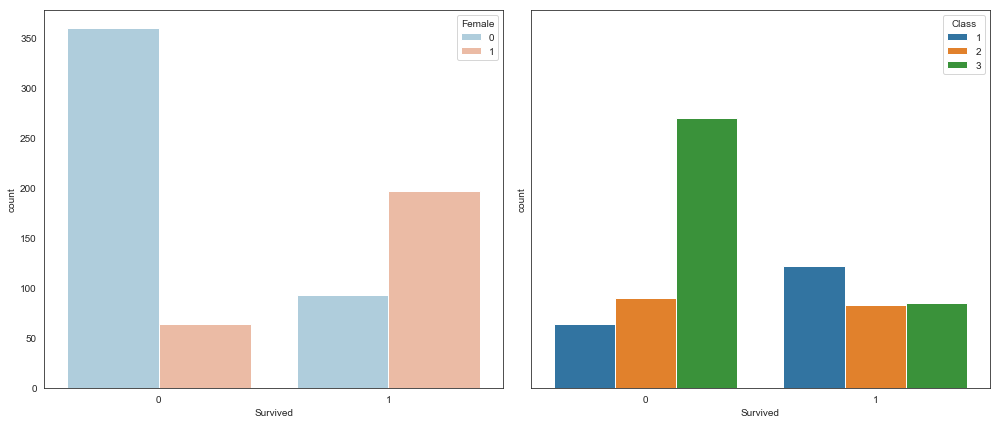

In [10]:
# Let's plot some of the data to get a sense of the picture it paints

f, axes = plt.subplots(1, 2, sharey = True, figsize=(14,6))
sns.countplot(x = 'Survived', hue = 'Female', palette = 'RdBu_r', data = train, ax = axes[0])
sns.countplot(x = 'Survived', hue = 'Class', data = train, ax = axes[1])
plt.tight_layout()
plt.show()

## 3) Modeling

In [11]:
# Let's start with our modeling process by splitting the dataframe into our features and our target feature
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [12]:
# Try some crossvalidation on our dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 3A) Vanilla Logistic Regression Model (Dataset as is)

Let's run the vanilla model before we engineer added features just to see how it performs.

In [14]:
# Run Vanilla Logistic Regression on the dataset and see what results we get
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

In [15]:
print('---------- RESULTS ----------')
print()
print('--- R-SQUARED ---')
print(logreg.score(X_test, y_test))
print('\n--- CONFUSION MATRIX ---')
print(confusion_matrix(y_test, predictions))
print('\n--- PERFORMANCE ---')
print(classification_report(y_test, predictions))
print('\n--- INTERCEPTS ---')
print(logreg.coef_)

---------- RESULTS ----------

--- R-SQUARED ---
0.8177966101694916

--- CONFUSION MATRIX ---
[[119  24]
 [ 19  74]]

--- PERFORMANCE ---
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       143
           1       0.76      0.80      0.77        93

   micro avg       0.82      0.82      0.82       236
   macro avg       0.81      0.81      0.81       236
weighted avg       0.82      0.82      0.82       236


--- INTERCEPTS ---
[[-3.49547657e-02  2.41077997e+00 -2.33371287e-01 -4.94697975e-02
  -1.05427257e+00  2.36193042e-03  1.02421604e+00  5.17612913e-02
   4.90668826e-01]]


It looks like it performs quite well as is! Let's add more features, run it again, and try Ridge and Lasso as well.

### 3B) Vanilla Logistic Regression Model (Adding Features)

In [16]:
# Check out the Age feature and see if we can convert that into multiple Boolean features
train['Age'].describe()

count    714.000000
mean      29.714286
std       14.526453
min        1.000000
25%       20.250000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
# Check out the Fare feature and see if we can convert that into multiple Boolean features
train['Fare'].describe()

count    714.000000
mean      34.695294
std       52.918912
min        0.000000
25%        8.050000
50%       15.740000
75%       33.375000
max      512.330000
Name: Fare, dtype: float64

In [20]:
# Create new features for the Age column
train['Age_Child']  = np.where((train['Age'] >= 17), 1, 0)
train['Age_Adult']  = np.where((train['Age'] <  17) & (train['Age'] < 60), 1, 0)
train['Age_Senior'] = np.where((train['Age'] >  60), 1, 0)

# Create new features for the Fare column
train['Fare_Low']  = np.where((train['Fare'] >= 25), 1, 0)
train['Fare_Med']  = np.where((train['Fare'] <  25) & (train['Fare'] < 100), 1, 0)
train['Fare_High'] = np.where((train['Fare'] > 100), 1, 0)

# Create new features for the Class column
train['Class1'] = np.where((train['Class'] == 1), 1, 0)
train['Class2'] = np.where((train['Class'] == 2), 1, 0)
train['Class3'] = np.where((train['Class'] == 3), 1, 0)

# Drop the original columns that we just changed
train.drop(['Age', 'Fare', 'Class'], axis = 1, inplace = True)

In [21]:
# Check out what the dataset looks like now
train.head()

,Survived,Female,SibSp,Parch,EmbC,EmbQ,EmbS,Age_Child,Age_Adult,Age_Senior,Fare_Low,Fare_Med,Fare_High,Class1,Class2,Class3
0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
1,1,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0
2,1,1,2,1,1,0,0,0,1,0,0,1,0,0,0,1
3,1,1,2,1,1,0,0,0,1,0,0,1,0,0,0,1
4,1,0,0,2,0,0,1,0,1,0,1,0,0,0,1,0


In [22]:
# Reseparate the features from the target feature
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [23]:
# Try some crossvalidation on our dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
# Run Vanilla Logistic Regression on the dataset and see what results we get
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)

In [25]:
print('---------- RESULTS ----------')
print()
print('--- R-SQUARED ---')
print(logreg.score(X_test, y_test))
print('\n--- CONFUSION MATRIX ---')
print(confusion_matrix(y_test, predictions))
print('\n--- PERFORMANCE ---')
print(classification_report(y_test, predictions))
print('\n--- INTERCEPTS ---')
print(logreg.coef_)

---------- RESULTS ----------

--- R-SQUARED ---
0.7966101694915254

--- CONFUSION MATRIX ---
[[118  25]
 [ 23  70]]

--- PERFORMANCE ---
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       143
           1       0.74      0.75      0.74        93

   micro avg       0.80      0.80      0.80       236
   macro avg       0.79      0.79      0.79       236
weighted avg       0.80      0.80      0.80       236


--- INTERCEPTS ---
[[ 2.56802163 -0.38739896 -0.21199063  0.47171758 -0.40347073 -0.0968526
  -0.99381025  0.9652045  -0.83311923  0.14097059 -0.16957633 -0.05163987
   0.90074808  0.04930301 -0.97865683]]


Turns out the new added features did not make the model any better. It actually was a small amount less accurate.

### 3C) Ridge Regression Model

In [30]:
ridgereg = RidgeClassifier(alpha = 0.35, fit_intercept = True)
ridgereg.fit(X_train, y_train)
predictions = ridgereg.predict(X_test)

In [31]:
print('---------- RESULTS ----------')
print()
print('--- R-SQUARED ---')
print(ridgereg.score(X_test, y_test))
print('\n--- CONFUSION MATRIX ---')
print(confusion_matrix(y_test, predictions))
print('\n--- PERFORMANCE ---')
print(classification_report(y_test, predictions))
print('\n--- INTERCEPTS ---')
print(ridgereg.coef_)

---------- RESULTS ----------

--- R-SQUARED ---
0.7966101694915254

--- CONFUSION MATRIX ---
[[116  27]
 [ 21  72]]

--- PERFORMANCE ---
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       143
           1       0.73      0.77      0.75        93

   micro avg       0.80      0.80      0.80       236
   macro avg       0.79      0.79      0.79       236
weighted avg       0.80      0.80      0.80       236


--- INTERCEPTS ---
[[ 0.98182309 -0.12473306 -0.07224079  0.15850752 -0.13551862 -0.02298891
  -0.33648632  0.33648632 -0.37008322  0.02759927 -0.02759927 -0.07142555
   0.34334753  0.00964463 -0.35299216]]


Looks like Ridge regression performs almost exactly as regular Vanilla regression. No strong benefits.

### 3D) LASSO Regression Model

In [54]:
lassoreg = Lasso(alpha = 0.005)
lassofit = lassoreg.fit(X_train, y_train)
predictions = lassofit.predict(X_test)

In [55]:
print('---------- RESULTS ----------')
print()
print('--- R-SQUARED ---')
print(lassoreg.score(X_test, y_test))
print('\n--- INTERCEPTS ---')
print(lassoreg.coef_)

---------- RESULTS ----------

--- R-SQUARED ---
0.37796512655481385

--- INTERCEPTS ---
[ 4.68705910e-01 -4.41417384e-02 -1.24007527e-02  7.20251502e-02
 -0.00000000e+00 -0.00000000e+00 -2.53718104e-01  1.15025668e-15
 -2.07589537e-02  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  1.49233469e-01  0.00000000e+00 -1.84803585e-01]


## 4) Results

It turns out that the highest-performing model was the simple version of __Vanilla Logistic Regression__ before adding the new features. Additionally, __LASSO Regression__ turned out to perform terribly, most likely due to the fact that there are few 